In [13]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [11]:
births = pd.read_csv('../data/raw/totSampDF.csv')

#### Columns of interest  
Mom age C  
Mom’s age to first baby C  
Weeks born early starting at 35-40 M  
Avg BirthWeights M  
Multiple Births C  
Plurality C  
Method of Birth M  
Birth Place M  
BMI / Mom’s weight / weight gain M&C 


In [5]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'Unnamed: 0.1', 'birth_year', 'birth_month',
       'birth_time', 'birth_day_of_wk', 'birth_place',
       'mothers_age_imputed', 'mothers_age', 'mothers_nativity',
       'mothers_residence_status', 'mothers_race', 'mothers_race_imputed',
       'mothers_hispanic_origin', 'mothers_hispanic_origin2',
       'paternity_acknow', 'mothers_marital_status',
       'mothers_maristat_imputed', 'mothers_education', 'fathers_age',
       'fathers_race', 'fathers_hispanic_origin',
       'fathers_hispanic_origin2', 'fathers_education',
       'prior_living_births', 'prior_dead_births', 'prior_terminations',
       'mo_prenatal_care_began', 'n_prenatal_visits', 'wic', 'cigs_tri1',
       'cigs_tri2', 'cigs_tri3', 'pre_preg_diab', 'gest_diab',
       'pre_preg_hypten', 'gest_hypten', 'hypten_ecl',
       'prev_preterm_birth', 'infertility_treatment', 'fertil_enhance',
       'asst_repro_tech', 'n_prev_cesar', 'gonorrhea', 'syphilis',
       'chlamydia', 'hepB', 'hepC', 'succes

## Baby weight time series

In [18]:
babywt = births[['birth_year', 'birth_month','birth_time','birth_weight_gm']]


In [8]:
meanwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].mean()

### Monthly Mean and Median birth weight by year

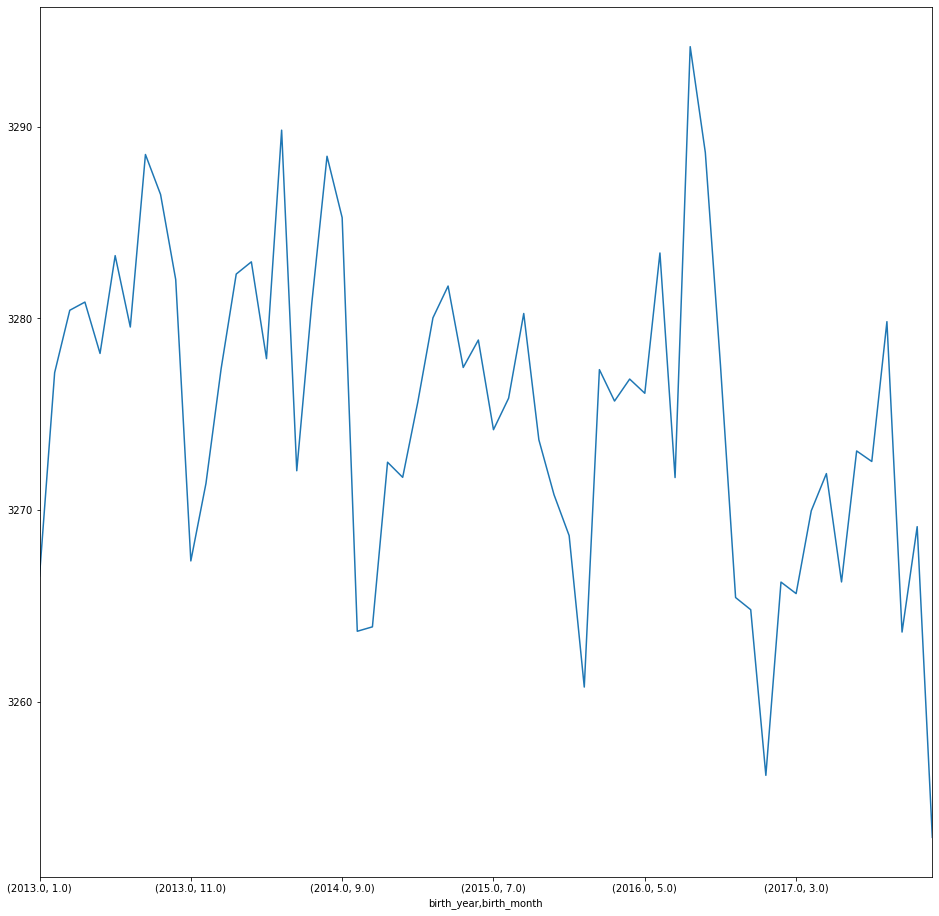

In [15]:
plt.figure(figsize=(16,16))

meanwt_ts.plot()
# plt.xlabel('Number of cases of Plurality')
# plt.ylabel('Years based on amount of Twins')

In [16]:
medwt_ts = babywt.groupby(['birth_year','birth_month'])['birth_weight_gm'].median()

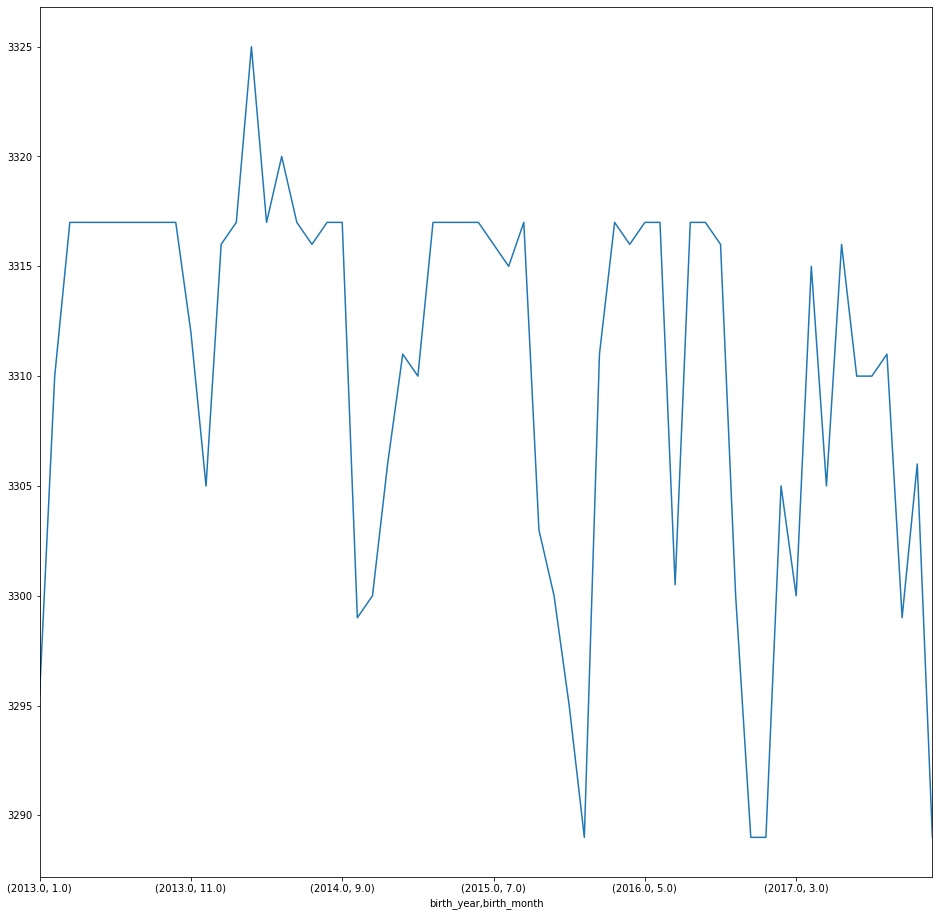

In [17]:
plt.figure(figsize=(16,16))
medwt_ts.plot()

### Yearly Mean and Median Birth weight 

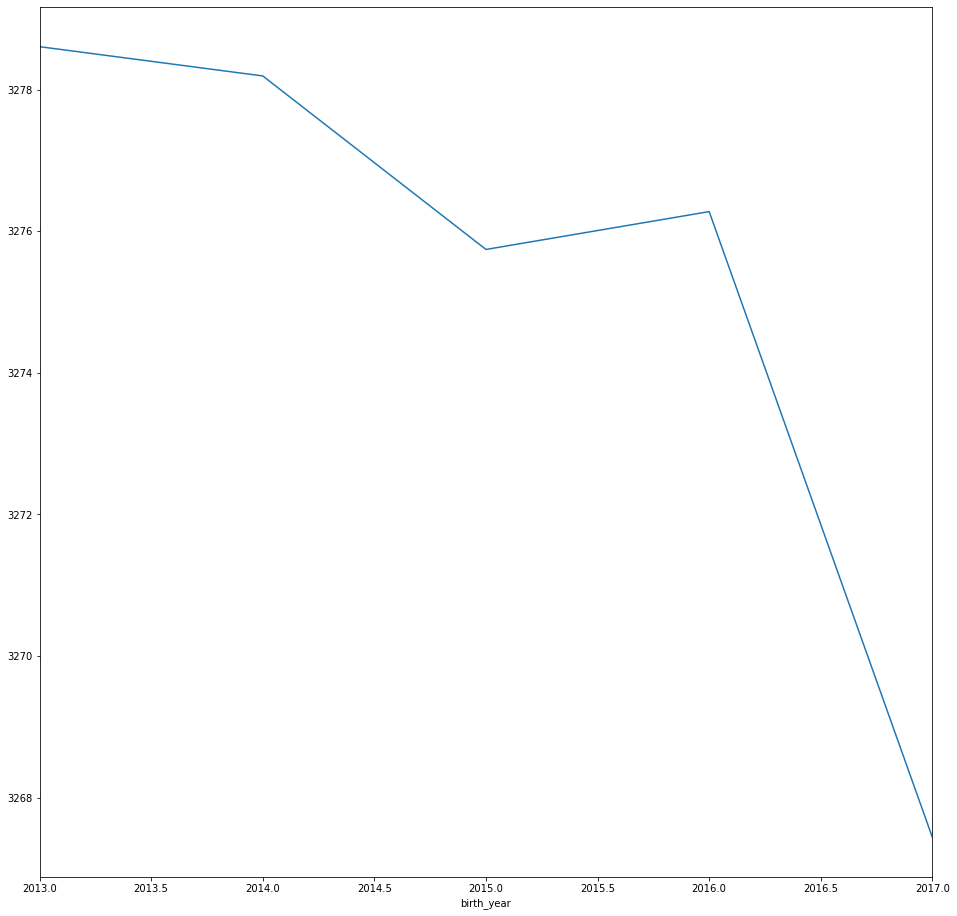

In [20]:
meanwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts2.plot()

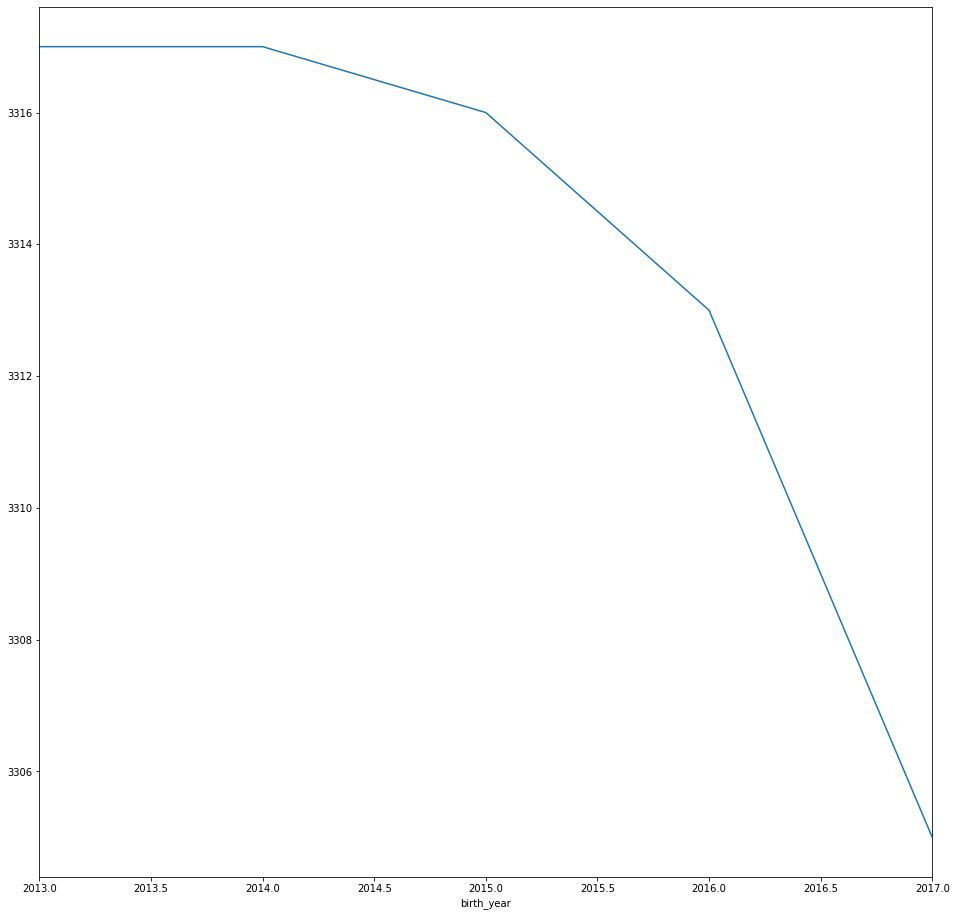

In [21]:
medwt_ts2 = babywt.groupby(['birth_year'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts2.plot()

### Monthly variation in baby birth weight

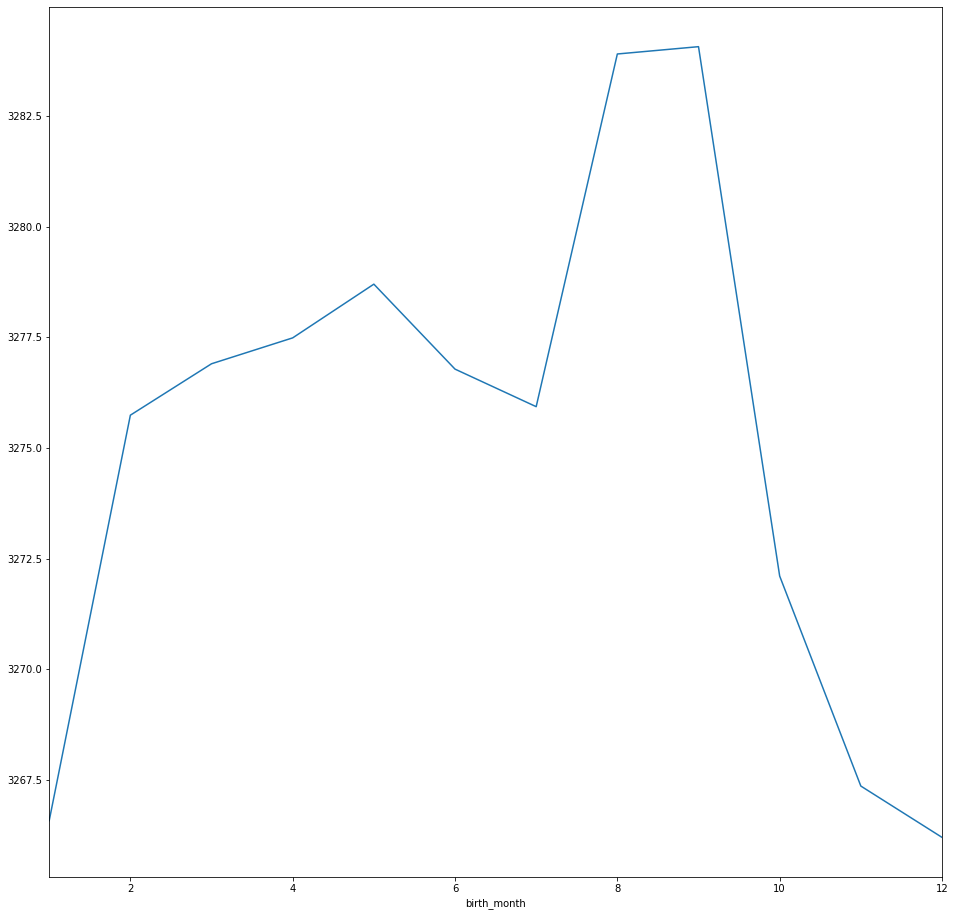

In [22]:
meanwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].mean()

plt.figure(figsize=(16,16))
meanwt_ts3.plot()

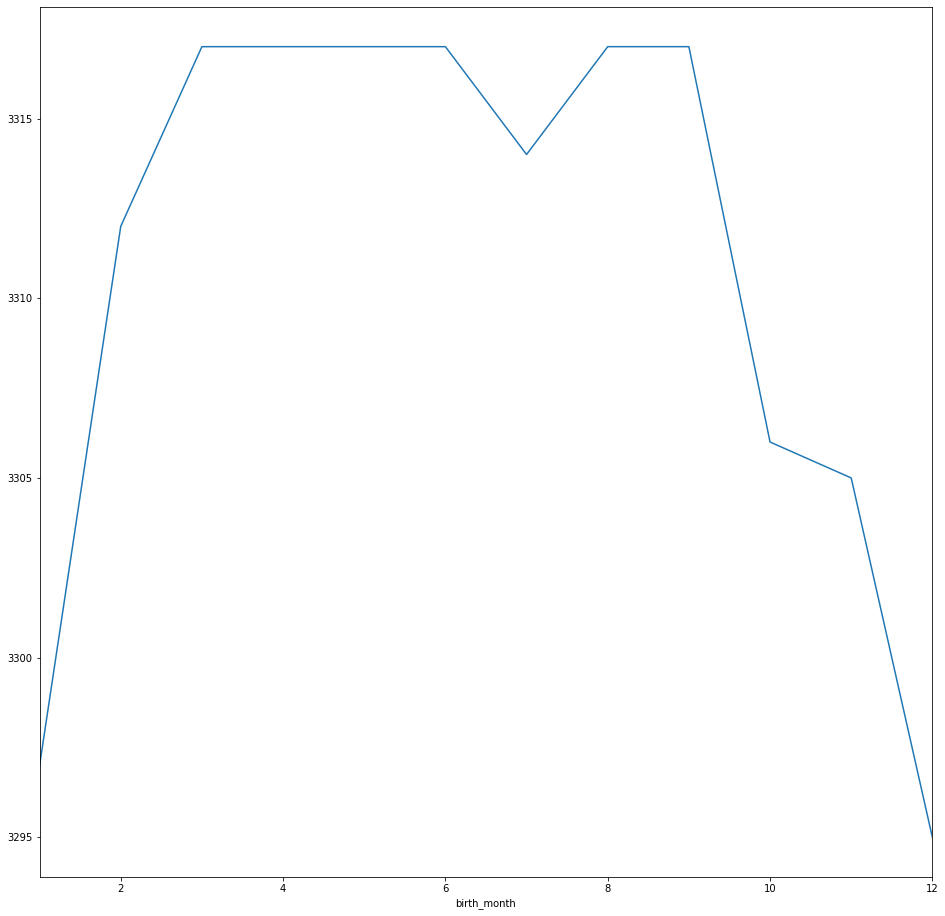

In [23]:
medwt_ts3 = babywt.groupby(['birth_month'])['birth_weight_gm'].median()

plt.figure(figsize=(16,16))
medwt_ts3.plot()

## Birth method 

In [63]:
method  = (births[['birth_year', 'birth_month','final_delivery_method']])
# method.groupby('birth_year')

#Missingness
print(method['final_delivery_method'].value_counts())  #total missing 
print(method.groupby(['birth_year'])['final_delivery_method'].value_counts()) #missing per year


1      367593
1.0    255687
4      183449
4.0    125533
        29573
3       15291
3.0     10222
1.0      4375
2        3283
2.0      2103
4.0      2012
9         396
9.0       247
3.0       197
2.0        34
9.0         4
Name: final_delivery_method, dtype: int64
birth_year  final_delivery_method
2013.0      1                        115765
            4                         58911
                                      18980
            3                          4897
            2                          1074
            9                           156
            1.0                         133
            4.0                          73
            3.0                           8
            2.0                           2
2014.0      1                        124373
            4                         62016
                                       7172
            3                          5217
            2                          1070
            9                           

## Column cleaning  
Add to general cleaning file

In [78]:
method2 = method.mask(method['final_delivery_method'] == ' ')
# method
# print('Masked method \n',method2['final_delivery_method'].value_counts())
# print('Unmasked method \n', method['final_delivery_method'].value_counts())
# births['final_delivery_method'] = pd.to_numeric(births['final_delivery_method'])
method2['final_delivery_method'] = method2['final_delivery_method'].astype(float)
method2.dtypes
method2.groupby(['birth_year'])['final_delivery_method'].value_counts()

birth_year  final_delivery_method
2013.0      1.0                      115898
            4.0                       58984
            3.0                        4905
            2.0                        1076
            9.0                         156
2014.0      1.0                      124389
            4.0                       62022
            3.0                        5219
            2.0                        1070
            9.0                         128
2015.0      1.0                      127580
            4.0                       62567
            3.0                        5180
            2.0                        1140
            9.0                         112
2016.0      1.0                      129929
            4.0                       63620
            3.0                        5246
            2.0                        1085
            9.0                         120
2017.0      1.0                      129859
            4.0                       6380

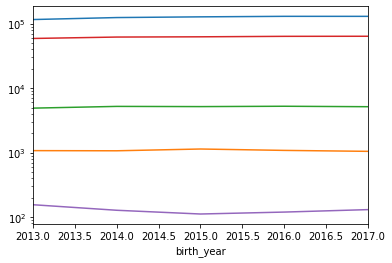

In [85]:
methodplt = method2.groupby(['birth_year'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

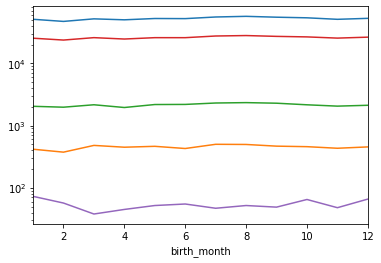

In [87]:
methodplt = method2.groupby(['birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

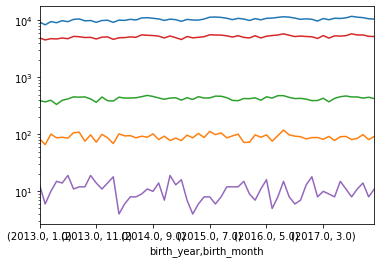

In [88]:
methodplt = method2.groupby(['birth_year','birth_month'])['final_delivery_method'].value_counts()
methodplt.unstack().plot(logy = True, legend = False)

## Place of birth trend

In [89]:
place = (births[['birth_year', 'birth_month','birth_place']])

In [93]:
print(place['birth_place'].value_counts()) #289573 missing
print(place.groupby(['birth_year'])['birth_place'].value_counts()) #missing per year

1      561077
1.0    387394
        29573
1.0      6532
3        4224
3.0      2939
2        2896
2.0      2097
5         706
4         586
4.0       514
7         444
5.0       437
7.0       330
6.0        61
6          58
2.0        36
3.0        33
9          21
9.0        20
4.0        12
7.0         5
5.0         3
9.0         1
Name: birth_place, dtype: int64
birth_year  birth_place
2013.0      1              178070
                            18980
            3                1320
            2                 876
            5                 231
            1.0               216
            4                 158
            7                 129
            6                  17
            9                   2
2014.0      1              189754
                             7172
            3                1428
            2                1015
            5                 216
            4                 209
            7                 149
            1.0               

In [100]:
place2 = place.mask(place['birth_place'] == ' ')
# place2
# print('Masked place \n', place2['birth_place'].value_counts())
place2['birth_place'] = place2['birth_place'].astype(float)
# method2.dtypes
place2.groupby(['birth_year'])['birth_place'].value_counts()

birth_year  birth_place
2013.0      1.0            178286
            3.0              1320
            2.0               876
            5.0               231
            4.0               158
            7.0               129
            6.0                17
            9.0                 2
2014.0      1.0            189776
            3.0              1429
            2.0              1015
            5.0               216
            4.0               210
            7.0               149
            6.0                22
            9.0                11
2015.0      1.0            193423
            3.0              1479
            2.0              1005
            5.0               259
            4.0               220
            7.0               166
            6.0                19
            9.0                 8
2016.0      1.0            196775
            3.0              1485
            2.0              1062
            4.0               237
            5.0         

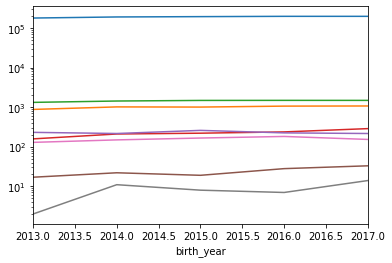

In [101]:
placeplt = place2.groupby(['birth_year'])['birth_place'].value_counts()
placeplt.unstack().plot(logy = True, legend = False)

## Useful functions


In [106]:
print("Value counts of %s \n" %('birth_place'), place['birth_place'].value_counts(), )

Value counts of birth_place 
 1      561077
1.0    387394
        29573
1.0      6532
3        4224
3.0      2939
2        2896
2.0      2097
5         706
4         586
4.0       514
7         444
5.0       437
7.0       330
6.0        61
6          58
2.0        36
3.0        33
9          21
9.0        20
4.0        12
7.0         5
5.0         3
9.0         1
Name: birth_place, dtype: int64


In [119]:
#check column for missing observations and look at distribution of value

def val_check(col):
    col = str(col)
    print( "Value counts of %s \n" %(col), births[col].value_counts())
    print("Value counts of %s by year \n" %(col), births.groupby(['birth_year'])[col].value_counts())

In [121]:
val_check('birth_place')

Value counts of birth_place 
 1      561077
1.0    387394
        29573
1.0      6532
3        4224
3.0      2939
2        2896
2.0      2097
5         706
4         586
4.0       514
7         444
5.0       437
7.0       330
6.0        61
6          58
2.0        36
3.0        33
9          21
9.0        20
4.0        12
7.0         5
5.0         3
9.0         1
Name: birth_place, dtype: int64
Value counts of birth_place by year 
 birth_year  birth_place
2013.0      1              178070
                            18980
            3                1320
            2                 876
            5                 231
            1.0               216
            4                 158
            7                 129
            6                  17
            9                   2
2014.0      1              189754
                             7172
            3                1428
            2                1015
            5                 216
            4                 

In [127]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

In [130]:
val_check(births, 7)

KeyError: 7

## Testing helper functions

In [99]:

def plotter(col):
    df[col].groupby(df['year'])[col].value.counts()
    col.plot(logy=True, legend = False
    xlabel
    ylabel
             

SyntaxError: invalid syntax (<ipython-input-99-872eb0b75209>, line 3)

In [ ]:
def map_plot(df):
    map(lamba col: plotter(col), col in df)